In [4]:
import numpy as np
import matplotlib.pyplot asplt

# TSAACS: Exercise Sheet 3 - Jamal, Lei, Dominik #

## Exercise 2 ##

### Task 1 ###



In [38]:
# Auto correlation of two points s,t in Index set
def auto_cor(x_s,x_t):
    res = np.cov(x_s,x_t)[0,1]/(np.sqrt(np.var(x_s)*np.var(x_t)))
    return res

# Take Matrix, average autocorrelation of columns with time difference tau
def auto_cor_tau(A, tau):
    N = np.shape(A)[0]
    T = np.shape(A)[1]
    sum = 0
    for i in range(T-tau):
        sum += auto_cor(A[:,i], A[:,i+tau])
    sum = sum/(T-tau)
    return sum

# Calculate Autocorrelation for different time-differences up to h_max
def auto_cor_function(A, h_max):
    res = np.zeros(h_max)
    for i in range(h_max):
        res[i] = auto_cor_tau(A,i+1)
    return res


### Task 2 ###

1) Gaussian White Noise with variance 1 is standard normal distributed. We see in the autocorrelation function that the autocorrelation is around zero, which we would expect for white noise

2) Moving Average Process of order 1: Here the results show that over one timestep (as expected by the definition of the process), the autocorrelation is high, while it vanishes over more than one time step

[ 0.00596189 -0.00277979 -0.01188322 -0.008337   -0.02760778] [ 0.45088896 -0.00294404 -0.01575892 -0.02234779 -0.03091432]


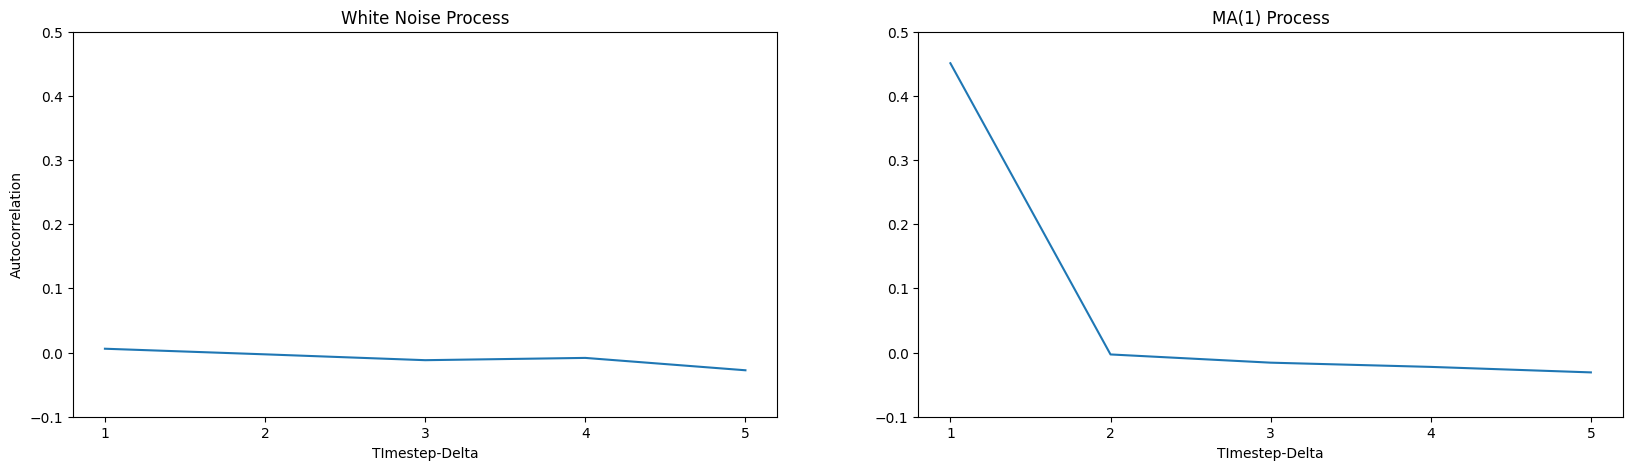

In [158]:
T = 100 # Amount of timesteps
N = 50 # Amount of paths
h_max = 5

# draw white noise Matrix of shape (NxT)
A = np.random.normal(size=(N,T+1))

# Moving average process: for each row of white noise matrix, 
# use formula X_t = 0.6eps_{t-1} + eps_t
B = np.zeros((N,T))
for i in range(N):
    for j in range(T):
        B[i,j] = 0.6*A[i,j] + A[i,j+1]


# Plot results
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
index1 = np.arange(1,h_max+1)
index2 = np.arange(1,h_max+1)
ax1.plot(index1, auto_cor_function(A,h_max))
ax2.plot(index2, auto_cor_function(B,h_max))

ax1.set_ylim(-0.1,0.5)
ax2.set_ylim(-0.1,0.5)

ax1.set_title("White Noise Process")
ax2.set_title("MA(1) Process")

ax1.set_xticks(index1)
ax2.set_xticks(index2)

ax1.set_xlabel("TImestep-Delta")
ax2.set_xlabel("TImestep-Delta")

ax1.set_ylabel("Autocorrelation")
ax1.set_ylabel("Autocorrelation")


print(auto_cor_function(A,h_max), auto_cor_function(B,h_max))



## Exercise 3 ##



First we plot the generated data

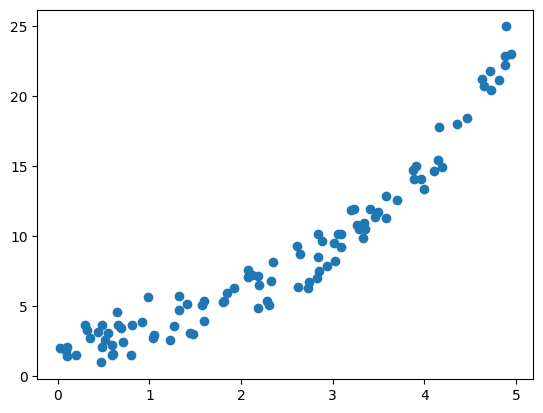

In [140]:
#Create random dataset, first of all look at it

np.random.seed(0)
T = 5*np.random.rand(100)
y = 2* np.exp(0.5*T) + np.random.randn(100)
one = np.ones_like(T)

plt.scatter(T,y)



For Gradient descent, we need the objective functions (Mean Squared error) and gradients in dependence of the parameters of the model

We then perform gradient descent and plot the resulting models with the data

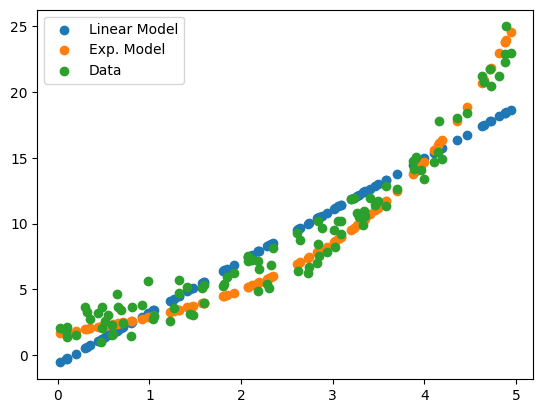

In [156]:
def lin_obj(a,b):
    return np.linalg.norm(a*T + b*one -y, 2)**2

def lin_grad(a,b):
    grad_a = np.dot(2*(a*T+b*one-y),T)
    grad_b = np.dot(2*(a*T+b*one-y),one)
    return np.array([grad_a,grad_b])

def exp_obj(a,b):
    return np.linalg.norm(a*np.exp(b*T)-y, 2)**2

def exp_grad(a,b):
    grad_a = np.sum(2*(a*np.exp(b*T)-y)*np.exp(b*T))
    grad_b = np.sum(2*(a*np.exp(b*T)-y)*a*T*np.exp(b*T))
    return np.array([grad_a,grad_b])
    

def lin_grad_desc(a0,b0,lam,t_final):
    obj_values = np.zeros(t_final)
    res = np.array([a0,b0])
    for i in range(t_final):
        res = res- lam*lin_grad(res[0],res[1])
        obj_values[i] = lin_obj(res[0],res[1])
    return res, obj_values

def exp_grad_desc(a0,b0,lam,t_final):
    obj_values = np.zeros(t_final)
    res = np.array([a0,b0])
    for i in range(t_final):
        res = res - lam*exp_grad(res[0],res[1])
        obj_values[i] = exp_obj(res[0],res[1])
    return res, obj_values

# Perform gradient descent for linear model
a0 = 1
b0 = 1
lam = 0.001
t_final = 1000

result, objective = lin_grad_desc(a0,b0,lam,t_final)

# Perform gradient descent for exponential model, 
# figured out that we need a really small stepsize!
a0 = 1
b0 = 0
lam = 0.000002
t_final = 1000

result2,objective2 = exp_grad_desc(a0,b0,lam,t_final)

plt.scatter(T,result[0]*T+result[1], label="Linear Model")
plt.scatter(T,result2[0]*np.exp(result2[1]*T), label="Exp. Model")
plt.scatter(T,y, label="Data")

plt.legend()

#plt.plot(objective2)


The Exponential model approximates the data quite well, as to be expected. The linear model does not. We also investigate how well gradient descent minimized the objective

Text(0, 0.5, 'Objective Function')

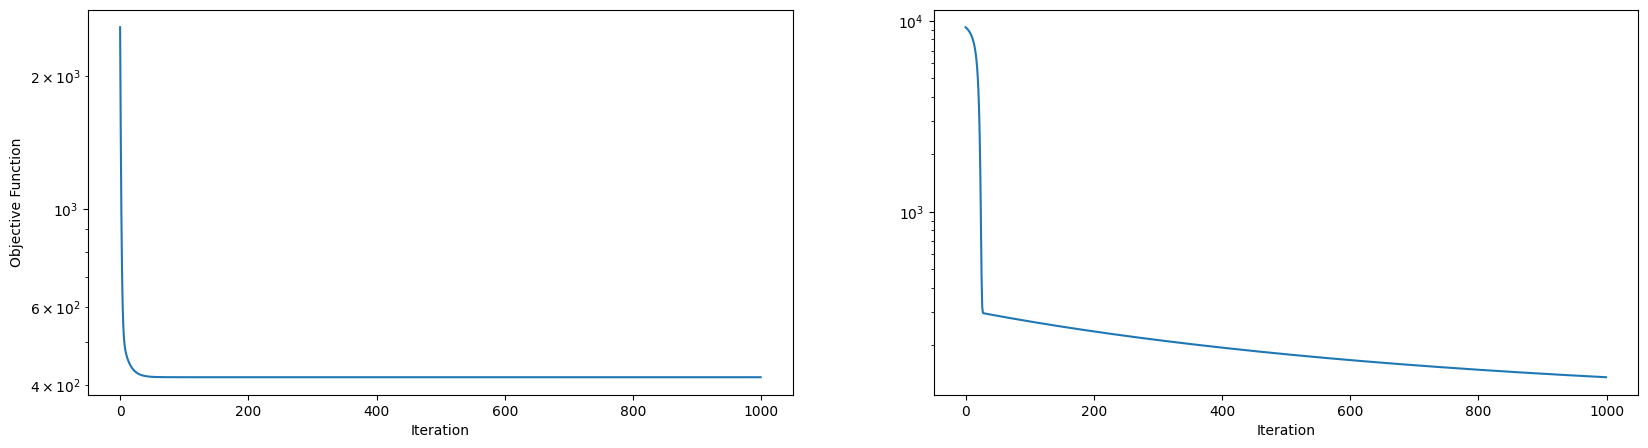

In [157]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.plot(objective, label="Linear Model")
ax2.plot(objective2, label="Exp. Model")
ax1.set_yscale("log")
ax2.set_yscale("log")

ax1.set_xlabel("Iteration")
ax2.set_xlabel("Iteration")

ax1.set_ylabel("Objective Function")
ax1.set_ylabel("Objective Function")
##


Our Linear Approximation seems to minimize the mean squared error quite fast, as far as it is possible for a linear function. The same can be said for the exponantial function